In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

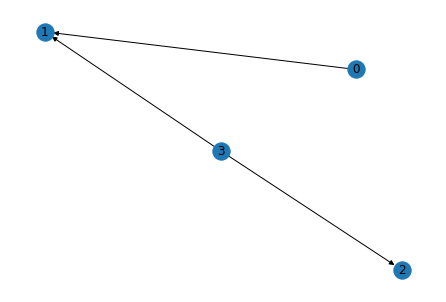

In [19]:
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3])
g.add_edges_from([(0,1),(3,1),(3,2)])
nx.draw(g, with_labels=True)

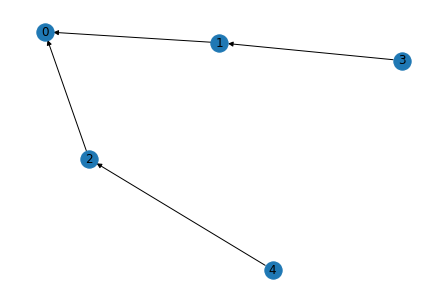

In [20]:
D = nx.gn_graph(5)
nx.draw(D, with_labels=True)

In [21]:
nx.d_separated(g, {0}, {2}, {})

True

In [48]:
def unblocked_path(g, path, Z):
    if not nx.is_path(g.to_undirected(), path):
        return False
    
    for x in path:
        parents_in_path=set(g.predecessors(x)).intersection(path)
        if x in Z:
            children_in_path=set(g.successors(x)).intersection(path)
            if children_in_path and (parents_in_path or len(children_in_path)>1):
                return False
        else:
            no_desc_in_Z=nx.descendants(g,x).isdisjoint(Z)
            if no_desc_in_Z and len(parents_in_path)>1:
                return False
    return True

def gen_dinfo(G):
    ns = list(G.nodes)
    start, end, cond = np.random.choice(ns,size=3,replace=False)
    return [{start}, {end}, {cond}]
    
    
def is_affirmative(answer):
    affirmative_answers = {'yes', 'true', 'aye', 'sim', '👍'}
    return (answer[0] == 'y') or (answer in affirmative_answers)

def is_negative(answer):
    negative_answers = {'no', 'false', 'não', '👎'}
    return (answer[0] == 'n') or (answer in negative_answers)
    
def parse(unblocked_raw):
    '''Parses unblocked path input, returns list of ints'''
    separators = {',', '.', '-', ';', ' '}
    
    unblocked = unblocked_raw.lower()     # ignore case
    unblocked = unblocked.strip()         # remove trailing spaces
    unblocked = unblocked.strip('[]{}()') # remove brackets
    
    sep_convention = separators.intersection(unblocked)
    if len(sep_convention) > 1:
        print("Sorry, I could't parse that. Try being a little more consistent")
        return
    elif len(sep_convention) == 1:  # in case the person used a separator
        sep = sep_convention.pop()
        unblocked = unblocked.split(sep)
        
    return [int(i) for i in unblocked]
    

    
def main():
    for _ in range(1):
        # Random Digraph
        random_D = None
        while random_D is None or not (nx.is_directed_acyclic_graph(random_D) and nx.is_connected(random_D.to_undirected())):
            random_D = nx.fast_gnp_random_graph(10, 0.1, directed=True)
        
        # Draw it
        nx.draw(random_D, with_labels=True)
        plt.show()
        
        # Random starting, ending and conditional sets
        s, e, c = gen_dinfo(random_D)
        
        d_sep_answer = nx.d_separated(random_D, s, e, c)
        
        # Take the input from user
        d_sep_input = None
        while d_sep_input is None:
            d_sep_raw = input(f'Are {s} and {e} d-separated conditioned on {c}?\n')
            d_sep = d_sep_raw.strip().lower()
            if is_affirmative(d_sep):
                d_sep_input = True
            elif is_negative(d_sep):
                d_sep_input = False
            else:
                print("Sorry, didn't catch that")
        
        if d_sep_answer and d_sep_input:
            print('Congrats!')
        elif d_sep_answer != d_sep_input:
            print('No! Try again')
        else: # Case in which it is not d-separated. So show the path.
            # Take the input from user
            unblocked_input = None
            while unblocked_input is None:
                unblocked_raw = input(f"Ok! Now give me one unblocked path between {s} and {e}\n")
                unblocked_list = parse(unblocked_raw)
                if unblocked_list:
                    if not ((unblocked_list[0] in s) and (unblocked_list[-1] in e)):
                        print(f"You have to start at {s} and end at {e}!")    
                    elif not set(random_D.nodes).issuperset(unblocked_list):
                        print('Not a valid list of nodes!')
                    else:
                        unblocked_input = unblocked_list
            
            if unblocked_path(random_D, unblocked_input, c):
                print('Congrats!!')
            else:
                print('Oh no :(')

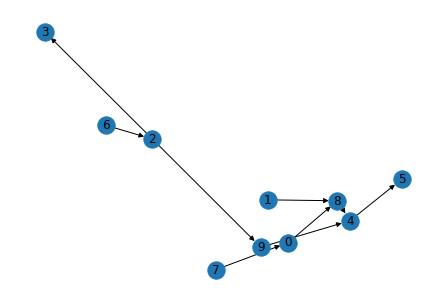

Are {4} and {0} d-separated conditioned on {7}?
no
Ok! Now give me one unblocked path between {4} and {0}
0
You have to start at {4} and end at {0}!
Ok! Now give me one unblocked path between {4} and {0}
0;4
You have to start at {4} and end at {0}!
Ok! Now give me one unblocked path between {4} and {0}
0,4
You have to start at {4} and end at {0}!
Ok! Now give me one unblocked path between {4} and {0}
4,0
Oh no :(


In [49]:
main()

In [ ]:
G = nx.fast_gnp_random_graph(10, 0.2, directed=True)
nx.draw(G, with_labels=True)
plt.show()
print(gen_dinfo(G))